# >>>> PERFORMING CLUSTERING USING (HIERARICAL, K-MEANS &DBSCAN) FOR THE CRIME DATA <<<

## HIERARICAL CLUSTERING ( AGGLOMORATIVE)

### IMPORT LIBRARIES

In [175]:
# PANDAS LIBRARIE IS USED FOR DATA MANIPULATION
import pandas as pd

# NUMPY USED FOR MATHEMATICAL OPERATION
import numpy as np

# MATPLOTLIB IS USED FOR VISUALIZATION PURPORSE
import matplotlib.pyplot as plt

# SEABORN IS USED FOR ADVANCED VISULIZATION 
import seaborn as sns

# SKLEARN IS USED TO BUILD MACHINE LEARNING MODELS
import sklearn as skl 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# SCIPY TO SOLVE SCIENTIFIC AND MATHEMATICAL PROBLEMS 
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import cdist

## IMPORT DATA

In [176]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [177]:
df.shape

(50, 5)

In [178]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [179]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [180]:
#from this values we knows that "Urban pop" values are negatively skewed and 'Rape' values are moderately positive skewed.
df.skew()

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [181]:
#from this values "Rape" values are some peaked
df.kurt()

Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

<AxesSubplot:>

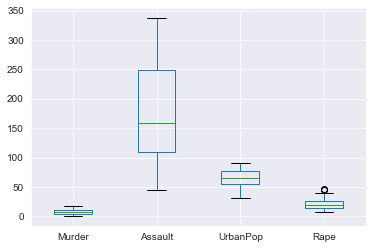

In [182]:
#From this boxplots we detect outlier in Rape column
df.boxplot()

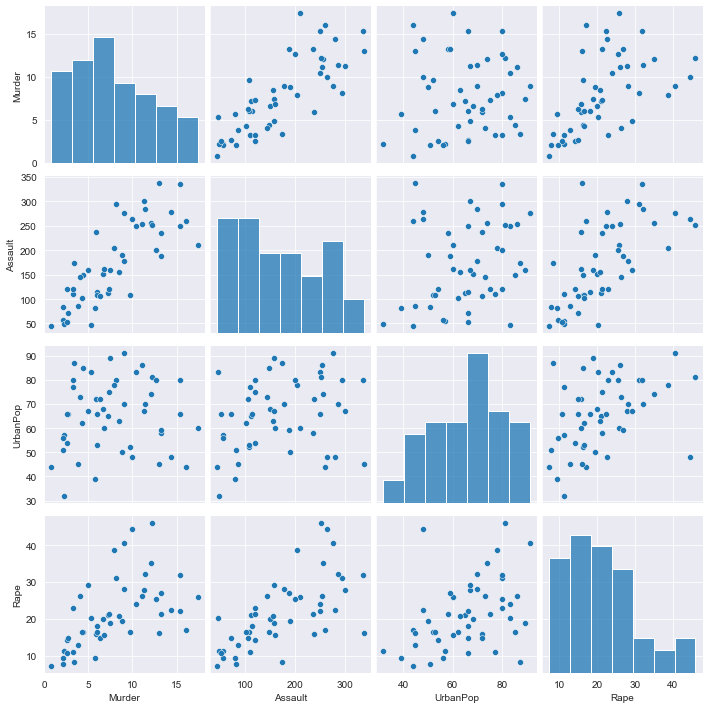

In [183]:
sn.set_style(style='darkgrid')
sn.pairplot(df)

In [184]:
#Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x


In [185]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


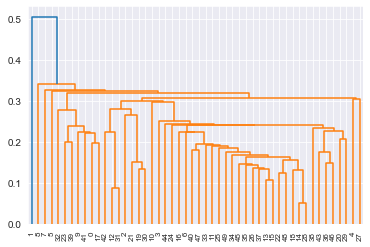

In [186]:
#create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))
#From this dendrogram we know that most of the values are lies so near in distance

In [187]:
#clusters
hc = AgglomerativeClustering(n_clusters=2,affinity= 'euclidean',linkage='single')

In [188]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [189]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head(10)

,Clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [190]:
data['h_clusterid'] = hc.labels_
data

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [191]:
data.value_counts('h_clusterid')
#By using 'single linkage' we formed two number of optimum clusters

h_clusterid
0    49
1     1
dtype: int64

In [192]:
data.iloc[:,1:5].groupby(data.h_clusterid).mean()

,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,
0,168.877551,65.897959,20.757143,0
1,263.000000,48.000000,44.500000,1


In agglomorative clustering by using single linkage we perform clustering process for crime_data.csv by this we get two optimum clusters 0 & 1

**In cluster=0 the average Murder rate,Assaut rate and Rape rates are (<) the average Murder rate,Assaut rate and Rape rates of cluster= 1, but urban population for cluster-0 (>) cluster-1.

**By comparing above clusters we observe that except 'Alaska' city remaining all 49 are similar in USA

**In Alaska city the population is small but the remaining crime rates are higher.

## COMPLETE LINKAGE

In [193]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\crime_data.csv")

In [194]:
df_norm= norm_func(data.iloc[:,1:])

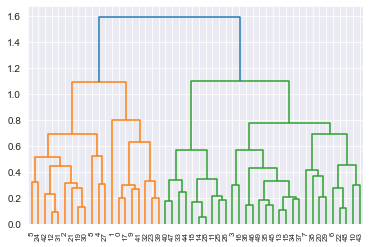

In [195]:
dendrogram1 = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [196]:
hc1 =AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [197]:
y_hc1= hc1.fit_predict(df_norm)
y_hc1

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [198]:
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])
Clusters.head(10)

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [199]:
data['h_clusterid'] = hc1.labels_
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [200]:
data.value_counts('h_clusterid')

h_clusterid
1    20
3    12
2    10
0     8
dtype: int64

In [201]:
data.iloc[:,1:5].groupby(data.h_clusterid).mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


<AxesSubplot:xlabel='h_clusterid', ylabel='Murder'>

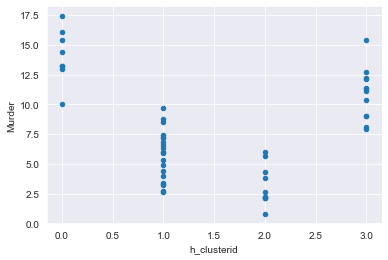

In [202]:
data.plot.scatter(x='h_clusterid',y='Murder')


<AxesSubplot:xlabel='h_clusterid', ylabel='Assault'>

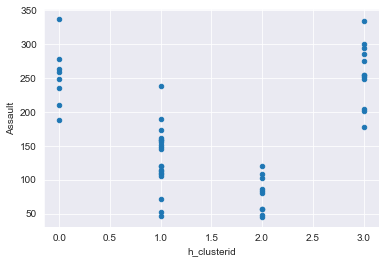

In [203]:
data.plot.scatter(x='h_clusterid',y='Assault')

<AxesSubplot:xlabel='h_clusterid', ylabel='Rape'>

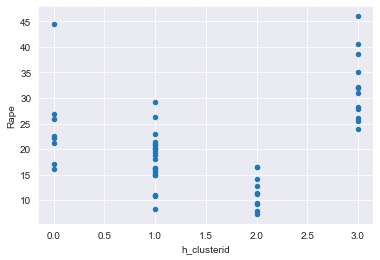

In [204]:
data.plot.scatter(x='h_clusterid',y='Rape')

In agglomorative clustering by using complete linkage we perform clustering process for crime_data.csv by this we get four clusters 0,1,2 & 3 without deviating the values

**By observing above four clusters we found that except Urban population remaining 3 columns are similarly clustered

**Since,mean value of Assault, Rape & Murder rates in each cluster are cluster2 < cluster 1 < cluster 0 < cluster 3

## K-MEANS CLUSTERING

In [205]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\crime_data.csv")

In [206]:
df_norm= norm_func(data.iloc[:,1:])

In [207]:
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x12d3ed00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

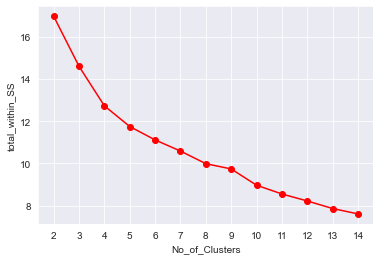

In [208]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [209]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters
model=KMeans(n_clusters=4).fit(df_norm)
model.cluster_centers_

array([[0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868]])

In [210]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
data['clust']=md # creating a  new column and assigning it to new column 
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [211]:
data.value_counts('clust')

clust
1    16
2    13
3    13
0     8
dtype: int64

In [212]:
data.iloc[:,1:5].groupby(data.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.656250,138.875000,73.875000,18.781250
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


By using K-means Clustering We perform clustering process for crime_data.csv by this we get four clusters 0,1,2 & 3 without deviating the values

**By observing above four clusters we found that except Urban population remaining 3 columns are similarly clustered

**Since,mean value of Assault, Rape & Murder rates in each cluster are cluster2 < cluster 0 < cluster 3 < cluster 1

## DBSCAN CLUSTERING

In [213]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [214]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\crime_data.csv")

In [215]:
data.drop(['Unnamed: 0'],axis=1,inplace=True) 

In [216]:
array = data.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [217]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [218]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

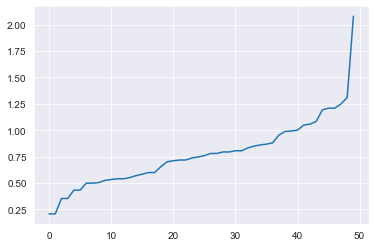

In [219]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [220]:
dbscan = DBSCAN(eps=1.25, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1.25)

In [221]:
dbscan.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [222]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [223]:
dm=pd.concat([data,cl],axis=1)
dm

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [224]:
dm.value_counts('cluster')

cluster
 2    32
 1     7
-1     6
 0     5
dtype: int64

In [225]:
dm.iloc[:,0:4].groupby(dm.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
-1,12.616667,287.000,64.833333,32.700000
0,14.720000,232.600,58.200000,23.720000
1,10.328571,263.000,76.857143,30.685714
2,5.243750,119.125,64.343750,16.625000


By using DBSCAN Clustering We perform clustering process for crime_data.csv by this we get three optimum clusters 0, 1, 2 & -1 without deviating the values

**In above clusters mean values are deviated from dimension to dimension not all mean values in same order so dbscan clustering doesn't form optimum number of clusters.

Since by using the above four clustering method we can find different clusters which contains different mean rates.